## Imports 


In [1]:
import pandas as pd
pd.set_option('display.max_columns', 300)
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import shapiro
from scipy.stats import normaltest
from sklearn.preprocessing import StandardScaler, RobustScaler
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [3]:
df = pd.read_csv('pek-sha.csv')
df1 = pd.read_csv('sha-pek.csv')

## data cleaning

In [ ]:
df.head()

In [4]:
## fill Nan's with 0 in the transit column 

df.traAirport.fillna(0, inplace = True)

In [5]:
df.traAirport.replace('LYA',1, inplace = True)

In [6]:
df1.traAirport.fillna(0, inplace = True)

In [7]:
df1.traAirport.replace('LYA',1, inplace = True)

In [ ]:
## , kind="reg"
sns.scatterplot(x='priceClass', y='price', data=df)

In [8]:
df['price'] = [x * 0.14 for x in df['price']]

In [9]:
df1['price'] = [x * 0.14 for x in df1['price']]

In [ ]:
df1.dateDifference = np.where(df1.dateDifference == -1, np.nan, df1.dateDifference)
df1.dropna(inplace=True)

In [ ]:
df.drop(['craftTypeCode', 'departureDate', 'arrivalDate'], axis =1, inplace = True)

In [ ]:
df1.drop(['craftTypeCode', 'departureDate', 'arrivalDate'], axis =1, inplace = True)

## EDA

#### DATA_SET 1

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
## , kind="reg"
sns.scatterplot(x='priceClass', y='price', data=df)

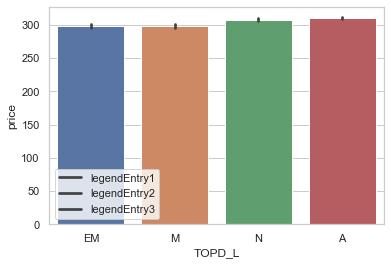

In [120]:
sns.barplot(x = df1['TOPD_L'], y = df1['price'], data = df1)
plt.legend(labels=['legendEntry1', 'legendEntry2', 'legendEntry3'])

In [ ]:
sns.barplot(x = df['MOPD'], y = df['price'], data = df)

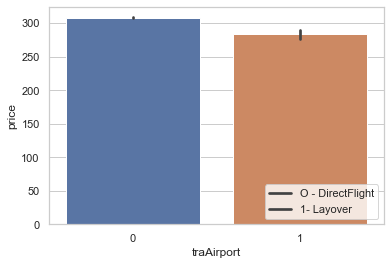

In [121]:
sns.barplot(x = df1['traAirport'], y = df1['price'], data = df1)
plt.legend(labels=['O - DirectFlight', '1- Layover'], loc = "lower right")

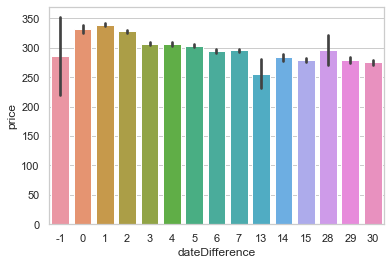

In [122]:
sns.barplot(x = ['dateDifference'], y = df1['price'], data = df1)

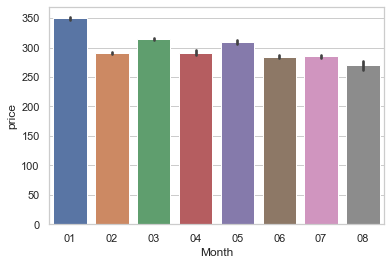

In [123]:
sns.barplot(x = df1['Month'], y = df1['price'], data = df1)

In [ ]:
sns.barplot(x = df['dateDifference'], y = df['price'], data = df)

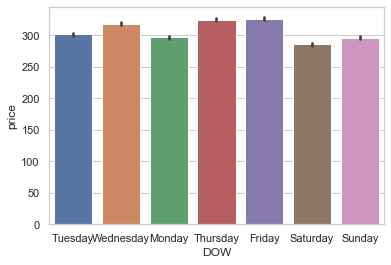

In [125]:
# Day of week departure v price
sns.barplot(x = df1['DOW'], y = df1['price'], data = df1)

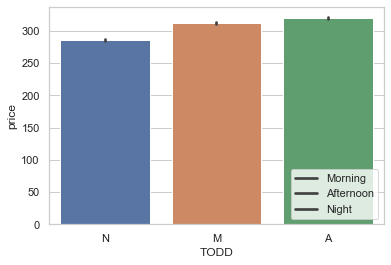

In [126]:
sns.barplot(x = df1['TODD'], y = df1['price'], data = df1)
plt.legend(labels=['Morning', 'Afternoon','Night'], loc = "lower right")

#### DATA_SET 2

In [ ]:
sns.heatmap(df1.isnull(), cbar=False)

In [ ]:
## , kind="reg"
sns.scatterplot(x='priceClass', y='price', data=df1)

In [ ]:
sns.barplot(x = df1['TOPD_L'], y = df1['price'], data = df1)

In [ ]:
sns.barplot(x = df1['MOPD'], y = df1['price'], data = df1)

In [ ]:
sns.barplot(x = df1['traAirport'], y = df1['price'], data = df1)

In [ ]:
sns.barplot(x = df1['dateDifference'], y = df1['price'], data = df1)

In [ ]:
#Day of week departure vs price
sns.barplot(x = df1['DOW'], y = df1['price'], data = df1)

In [ ]:
sns.barplot(x = df1['TODD'], y = df1['price'], data = df1)

## Feature Enginnerring 

#### DEPARTURE DATE

In [10]:
## Get the Departure Date 
df['DD']= [x[:10] for x in df.departureDate]

In [11]:
## Get the Departure Date 
df1['DD']= [x[:10] for x in df1.departureDate]

#### Depature Month

In [12]:
## Get the Departure Month 
df['Month'] = [x[5:7] for x in df['DD']]

In [13]:
## Get the Departure Month 
df1['Month'] = [x[5:7] for x in df1['DD']]

In [14]:
import calendar 
import datetime


In [15]:
## function to find the day of the week 
def findDay(date):
    born = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
    return (calendar.day_name[born])

#### Day_of_week

In [16]:
df['DOW'] = [findDay(x) for x in df['DD']]

In [17]:
df1['DOW'] = [findDay(x) for x in df1['DD']]

#### Time_of_day

In [18]:
df['TOD']= [x[11:16] for x in df.departureDate]

In [19]:
df1['TOD']= [x[11:16] for x in df1.departureDate]

In [20]:
df['TOD'] = pd.to_datetime(df['TOD'])



In [21]:
df1['TOD'] = pd.to_datetime(df1['TOD'])



In [22]:
df['TOD'] = [time.time() for time in df['TOD']]

In [23]:
df1['TOD'] = [time.time() for time in df1['TOD']]

#### TODD

In [24]:
df['TODD']= np.where(((df['TOD']> datetime.time(6,0)) & (df['TOD']<= datetime.time(12,0))), 'M', np.nan)
df['TODD'] = np.where(((df['TOD']> datetime.time(12,0)) & (df['TOD']<= datetime.time(18,0))), 'A', df['TODD'])
df['TODD'] = np.where(((df['TOD']> datetime.time(18,0)) & (df['TOD']<= datetime.time(23,0))), 'N', df['TODD'])

In [25]:
df1['TODD']= np.where(((df1['TOD']> datetime.time(6,0)) & (df1['TOD']<= datetime.time(12,0))), 'M', np.nan)
df1['TODD'] = np.where(((df1['TOD']> datetime.time(12,0)) & (df1['TOD']<= datetime.time(18,0))), 'A', df1['TODD'])
df1['TODD'] = np.where(((df1['TOD']> datetime.time(18,0)) & (df1['TOD']<= datetime.time(23,0))), 'N', df1['TODD'])

#### Purchase_Day

In [26]:
df['PD'] = [x[:10] for x in df['createDate']]

In [27]:
df1['PD'] = [x[:10] for x in df1['createDate']]

#### MOPD

In [28]:
df['MOPD'] = [x[5:7] for x in df['PD']]

In [29]:
df1['MOPD'] = [x[5:7] for x in df1['PD']]

#### DOPD

In [30]:
df['DOPD'] = [x[:10] for x in df['createDate']]
df['DOPD'] = [findDay(x) for x in df['DOPD']]

In [31]:
df1['DOPD'] = [x[:10] for x in df1['createDate']]
df1['DOPD'] = [findDay(x) for x in df1['DOPD']]

#### TOPD

In [32]:
df['TOPD'] = [x[11:16] for x in df['createDate']]
df['TOPD'] = pd.to_datetime(df['TOPD'])
df['TOPD'] = [time.time() for time in df['TOPD']]

In [33]:
df1['TOPD'] = [x[11:16] for x in df1['createDate']]
df1['TOPD'] = pd.to_datetime(df1['TOPD'])
df1['TOPD'] = [time.time() for time in df1['TOPD']]

#### TOPD_L

In [34]:
df['TOPD_L']= np.where(((df['TOPD']>= datetime.time(0,0)) & (df['TOPD']< datetime.time(6,0))), 'EM', np.nan)
df['TOPD_L']= np.where(((df['TOPD']>= datetime.time(6,0)) & (df['TOPD']<= datetime.time(12,0))), 'M', df['TOPD_L'])
df['TOPD_L'] = np.where(((df['TOPD']> datetime.time(12,0)) & (df['TOPD']<= datetime.time(18,0))), 'A', df['TOPD_L'])
df['TOPD_L'] = np.where(((df['TOPD']> datetime.time(18,0)) & (df['TOPD']<= datetime.time(23,59))), 'N', df['TOPD_L'])

In [35]:
df1['TOPD_L']= np.where(((df1['TOPD']>= datetime.time(0,0)) & (df1['TOPD']< datetime.time(6,0))), 'EM', np.nan)
df1['TOPD_L']= np.where(((df1['TOPD']>= datetime.time(6,0)) & (df1['TOPD']<= datetime.time(12,0))), 'M', df1['TOPD_L'])
df1['TOPD_L'] = np.where(((df1['TOPD']> datetime.time(12,0)) & (df1['TOPD']<= datetime.time(18,0))), 'A', df1['TOPD_L'])
df1['TOPD_L'] = np.where(((df1['TOPD']> datetime.time(18,0)) & (df1['TOPD']<= datetime.time(23,59))), 'N', df1['TOPD_L'])

In [ ]:
df

In [ ]:
df1['TOPD_L'].unique()

In [36]:
df.shape

(300336, 24)

In [37]:
df1.shape

(268581, 24)

## Dummies

#### Dummies

In [38]:
dummies1 = pd.get_dummies(df['TOPD_L'], prefix = 'TOPD_L', drop_first = True)

In [ ]:
dummies1

In [ ]:
lr_model = ols(formula= 'price~dummies1', data=df).fit()

lr_model.summary()

In [ ]:
lr1_model = ols(formula= 'price~dummies1', data=df).fit()

lr1_model.summary()

#### More Feature Engineering 

In [39]:
df['TOPDL_1']= np.where(df['TOPD_L']== 'EM', 1, 0)

In [40]:
df1['TOPDL_1']= np.where(((df1['TOPD_L']== 'EM') | (df1['TOPD_L']== 'M')), 1, 0)

In [42]:
df1

,ID,flightNumber,craftTypeCode,depAirport,traAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference,DD,Month,DOW,TOD,TODD,PD,MOPD,DOPD,TOPD,TOPD_L,TOPDL_1
0,78246995,CA1550,77W,SHA,0,PEK,2019-07-16 19:55:00,2019-07-16 22:10:00,C,Z,417.2,0.52,2019-07-17 02:32:27,-1,2019-07-16,07,Tuesday,19:55:00,N,2019-07-17,07,Wednesday,02:32:00,EM,1
1,78246997,CA1550,77W,SHA,0,PEK,2019-07-16 19:55:00,2019-07-16 22:10:00,C,J,813.4,1.00,2019-07-17 02:32:27,-1,2019-07-16,07,Tuesday,19:55:00,N,2019-07-17,07,Wednesday,02:32:00,EM,1
2,78246998,CA1550,77W,SHA,0,PEK,2019-07-16 19:55:00,2019-07-16 22:10:00,C,D,522.2,0.65,2019-07-17 02:32:27,-1,2019-07-16,07,Tuesday,19:55:00,N,2019-07-17,07,Wednesday,02:32:00,EM,1
3,78246999,CA1550,77W,SHA,0,PEK,2019-07-16 19:55:00,2019-07-16 22:10:00,C,C,583.8,0.72,2019-07-17 02:32:27,-1,2019-07-16,07,Tuesday,19:55:00,N,2019-07-17,07,Wednesday,02:32:00,EM,1
4,78247002,MU5125,33L,SHA,0,PEK,2019-07-16 20:05:00,2019-07-16 22:10:00,C,I,280.0,0.36,2019-07-17 02:32:27,-1,2019-07-16,07,Tuesday,20:05:00,N,2019-07-17,07,Wednesday,02:32:00,EM,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268576,77617774,MU5389,325,SHA,1,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,Y,R,116.2,0.56,2019-07-14 23:28:01,7,2019-07-21,07,Sunday,07:20:00,M,2019-07-14,07,Sunday,23:28:00,N,0
268577,77617775,MU5389,325,SHA,1,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,Y,R,123.2,0.60,2019-07-14 23:28:01,7,2019-07-21,07,Sunday,07:20:00,M,2019-07-14,07,Sunday,23:28:00,N,0
268578,77617776,MU5389,325,SHA,1,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,Y,R,128.8,0.62,2019-07-14 23:28:01,7,2019-07-21,07,Sunday,07:20:00,M,2019-07-14,07,Sunday,23:28:00,N,0
268579,77617777,MU5389,325,SHA,1,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,Y,R,110.6,0.54,2019-07-14 23:28:01,7,2019-07-21,07,Sunday,07:20:00,M,2019-07-14,07,Sunday,23:28:00,N,0


In [41]:
dummiesa = pd.get_dummies(df['MOPD'], prefix = 'MOPD', drop_first = True)
df = pd.concat([df,dummiesa], axis =1)

In [ ]:
df

In [43]:
dummiesMOPD = pd.get_dummies(df1['MOPD'], prefix = 'MOPD', drop_first = True)

In [ ]:
dummiesMOPD

In [ ]:
dummiesMOPD['price'] = df1['price']

In [ ]:
dummiesMOPD.drop('price', axis= 1, inplace = True)

In [ ]:
lr1_model = ols(formula= 'price~MOPD_02+MOPD_03 +MOPD_04+MOPD_05+MOPD_06+MOPD_07', data=dummiesMOPD).fit()

lr1_model.summary()

In [ ]:
df1.groupby('MOPD').price.mean()

In [44]:
df1 = pd.concat([df1,dummiesMOPD], axis = 1)

In [ ]:
df

In [ ]:
df1

In [45]:
df1['dateDifference'] = df1['dateDifference'].astype(int)

In [ ]:
df1

In [46]:
dummiesdate_Diff = pd.get_dummies(df1['dateDifference'], prefix = 'dateDifference', drop_first = True)

In [ ]:
dummiesdate_Diff

In [47]:
df1 = pd.concat([df1,dummiesdate_Diff], axis = 1)

In [ ]:
df1.shape

In [48]:
dummiesc = pd.get_dummies(df['cabinClass'], prefix = 'cabinClass', drop_first = True)
dummiesd = pd.get_dummies(df['Month'], prefix = 'Month', drop_first = True)
dummiese = pd.get_dummies(df['DOW'], prefix = 'DOW', drop_first = True)
dummiesf = pd.get_dummies(df['TODD'], prefix = 'TODD', drop_first = True)
df = pd.concat([df,dummiesc,dummiesd,dummiese,dummiesf], axis =1)

In [49]:
dummiesc_cabinClass = pd.get_dummies(df1['cabinClass'], prefix = 'cabinClass', drop_first = True)
dummies_Month = pd.get_dummies(df1['Month'], prefix = 'Month', drop_first = True)
dummies_DOW = pd.get_dummies(df1['DOW'], prefix = 'DOW', drop_first = True)
dummies_TODD = pd.get_dummies(df1['TODD'], prefix = 'TODD', drop_first = True)
df1 = pd.concat([df1,dummiesc_cabinClass,dummies_Month,dummies_DOW,dummies_TODD], axis =1)

In [ ]:
df

In [50]:
dummies_dateDiff = pd.get_dummies(df['dateDifference'], prefix = 'dateDifference', drop_first = True)
df = pd.concat([df,dummies_dateDiff], axis =1)

In [ ]:
df.columns

In [51]:
final_df = df.drop(['createDate','DD','PD','TOD','TOPD','TOPD_L',
                   'ID', 'flightNumber', 'craftTypeCode', 'depAirport','arrAirport',
                    'departureDate', 'arrivalDate','rate','priceClass',
                   'cabinClass','dateDifference','Month','DOW','DOPD','MOPD','TODD'
                   ],axis =1)

In [52]:
final_df.shape

(300336, 34)

In [ ]:
df1.columns

In [54]:
final_df1 = df1.drop(['createDate','DD','PD','TOD','TOPD','TOPD_L',
                   'ID', 'flightNumber', 'craftTypeCode', 'depAirport','arrAirport',
                    'departureDate', 'arrivalDate','rate','priceClass',
                   'cabinClass','dateDifference','Month','DOW','DOPD','MOPD','TODD'
                   ],axis =1)

In [55]:
final_df1.shape

(268581, 40)

In [56]:
final_df1.columns

Index(['traAirport', 'price', 'TOPDL_1', 'MOPD_02', 'MOPD_03', 'MOPD_04',
       'MOPD_05', 'MOPD_06', 'MOPD_07', 'dateDifference_0', 'dateDifference_1',
       'dateDifference_2', 'dateDifference_3', 'dateDifference_4',
       'dateDifference_5', 'dateDifference_6', 'dateDifference_7',
       'dateDifference_13', 'dateDifference_14', 'dateDifference_15',
       'dateDifference_28', 'dateDifference_29', 'dateDifference_30',
       'cabinClass_F', 'cabinClass_Y', 'Month_02', 'Month_03', 'Month_04',
       'Month_05', 'Month_06', 'Month_07', 'Month_08', 'DOW_Monday',
       'DOW_Saturday', 'DOW_Sunday', 'DOW_Thursday', 'DOW_Tuesday',
       'DOW_Wednesday', 'TODD_M', 'TODD_N'],
      dtype='object')

## Models


#### Data_set 1

In [57]:
outcome = 'price'
predictors = final_df.drop('price', axis =1)
pred_sum = '+'.join(predictors.columns)
formula = outcome +'~'+ pred_sum
model = ols(formula = formula, data = final_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                 2.225e+04
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        08:40:54   Log-Likelihood:            -1.8935e+06
No. Observations:              300336   AIC:                         3.787e+06
Df Residuals:                  300302   BIC:                         3.787e+06
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           608.8000      1.180    515.748      0.000     606.486     611.114
traAirport          -14.6900      1.772     -8.291      0.000     -18.163     -11.217
TOPDL_1              -2.7776      0.862     -3.221      0.001      -4.468      -1.087
MOPD_02              16.9108      1.627     10.394      0.000      13.722      20.100
MOPD_03              21.2718      2.246      9.469      0.000      16.869      25.675
MOPD_04              49.7586      3.165     15.724      0.000      43.556      55.961
MOPD_05              61.0319      3.989     15.299      0.000      53.213      68.851
MOPD_06              66.4783      4.739     14.029      0.000      57.191      75.766
MOPD_07              64.9970      5.255     12.368      0.000      54.697      75.298
cabinClass_F        106.2774      0.903    117.676      0.000     104.507     108.047
cabinClass_Y       -389.6780      0.573   -679.847      0.000    -390.801    -388.555
Month_02            -35.3520      1.617    -21.862      0.000     -38.521     -32.183
Month_03            -23.4565      2.209    -10.617      0.000     -27.787     -19.126
Month_04            -21.6442      3.000     -7.215      0.000     -27.524     -15.764
Month_05            -50.5442      3.930    -12.860      0.000     -58.248     -42.841
Month_06            -68.2765      4.731    -14.432      0.000     -77.549     -59.004
Month_07            -67.3494      5.245    -12.841      0.000     -77.629     -57.070
Month_08            -70.8674      6.407    -11.062      0.000     -83.424     -58.311
DOW_Monday          -40.8351      0.920    -44.379      0.000     -42.639     -39.032
DOW_Saturday        -62.7757      0.908    -69.146      0.000     -64.555     -60.996
DOW_Sunday          -35.6666      0.915    -38.977      0.000     -37.460     -33.873
DOW_Thursday         -9.6965      0.920    -10.545      0.000     -11.499      -7.894
DOW_Tuesday         -21.3229      0.925    -23.059      0.000     -23.135     -19.510
DOW_Wednesday       -10.4180      0.920    -11.328      0.000     -12.221      -8.615
TODD_M              -36.1666      0.567    -63.824      0.000     -37.277     -35.056
TODD_N              -22.1840      0.637    -34.799      0.000     -23.433     -20.934
dateDifference_2     -2.7387      0.923     -2.967      0.003      -4.548      -0.930
dateDifference_3    -11.7016      0.911    -12.847      0.000     -13.487      -9.916
dateDifference_4    -12.5255      1.198    -10.457      0.000     -14.873     -10.178
dateDifference_5    -12.9050      0.918    -14.059      0.000     -14.704     -11.106
dateDifference_6    -17.5180      1.214    -14.436      0.000     -19.896     -15.140
dateDifference_7    -18.8248      0.924    -20.381      0.000     -20.635     -17.014
dateDifference_15   -14.3243      1.167    -12.271      0.000     -16.612

#### TRAIN_TEST_SPLIT

In [58]:
target = final_df.price

In [ ]:
target

In [59]:
features = ['traAirport', 'TOPDL_1', 'MOPD_02', 'MOPD_03', 'MOPD_04',
       'MOPD_05', 'MOPD_06', 'MOPD_07', 'cabinClass_F', 'cabinClass_Y',
       'Month_02', 'Month_03', 'Month_04', 'Month_05', 'Month_06', 'Month_07',
       'Month_08', 'DOW_Monday', 'DOW_Saturday', 'DOW_Sunday', 'DOW_Thursday',
       'DOW_Tuesday', 'DOW_Wednesday', 'TODD_M', 'TODD_N', 'dateDifference_2',
       'dateDifference_3', 'dateDifference_4', 'dateDifference_5',
       'dateDifference_6', 'dateDifference_7', 'dateDifference_15',
       'dateDifference_30']

In [60]:
#improt train_test_split from sklearn package


#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(final_df[features], target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (240268, 33) Target:  (240268,)
Training set - Features:  (60068, 33) Target:  (60068,)


In [61]:
# fit a model


#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


print(lm.intercept_)
print(lm.coef_)

608.2779378791595
[ -13.058549     -3.10848652   16.30534965   22.15241998   53.37727014
   64.38364655   71.3454336    70.2670315   106.86969089 -389.2306554
  -34.59108079  -23.64849362  -25.11965069  -53.76227867  -72.85630806
  -72.23385481  -75.93101363  -41.18529907  -63.05566858  -35.9872373
   -9.67179949  -21.35122223  -10.63148596  -35.9573067   -22.04680468
   -2.95483887  -11.4586021   -12.43447213  -12.89251271  -17.15565438
  -19.22780771  -14.72899178    1.91534206]


In [62]:
print ("R^2 Score:", lm.score(X_train, y_train))


R^2 Score: 0.7093187749165212


In [63]:
y_train_pred = lm.predict(X_train)

In [64]:
#import the metrics module from sklearn
from sklearn import metrics

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 93.29700885244966
Mean Squared Error: 17538.284145144433
Root Mean Squared Error: 132.43218696806466


In [65]:
price_std = target.std()
print(price_std)
print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

245.70047935921252
Mean Absolute Error: 0.37971846492024963
Root Mean Squared Error: 0.5389984883767754


In [66]:
final_df.price.mean()

309.3558575062597

In [67]:
y_pred = lm.predict(X_test)

In [68]:
print ("Score:", lm.score(X_test, y_test))


Score: 0.7111413717947371


In [69]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:93.2528529446576
Mean Squared Error:17476.574597536586
Root Mean Squared Error:132.19899620472384


In [70]:
y_h_linear_train_01 = np.reshape(lm.predict(X_train),(240268,1))
y_h_linear_test_01 = np.reshape(lm.predict(X_test),(60068,1))

In [71]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.3795387505464429
Root Mean Squared Error Z: 0.538049402872551


In [72]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  132 vs. Testing:  132


In [ ]:
# Ridge and lasso

In [73]:

ridge_01 = Ridge(alpha=0.1)
ridge_01.fit(X_train, y_train)

lasso_01 = Lasso(alpha=0.1)
lasso_01.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [74]:
print("Unpenalized Linear Regression Coefficients are:{}".format(lm.coef_))
print(abs(lm.coef_.sum()))
print("Unpenalized Linear Regression Intercept:{}".format(lm.intercept_))

Unpenalized Linear Regression Coefficients are:[ -13.058549     -3.10848652   16.30534965   22.15241998   53.37727014
   64.38364655   71.3454336    70.2670315   106.86969089 -389.2306554
  -34.59108079  -23.64849362  -25.11965069  -53.76227867  -72.85630806
  -72.23385481  -75.93101363  -41.18529907  -63.05566858  -35.9872373
   -9.67179949  -21.35122223  -10.63148596  -35.9573067   -22.04680468
   -2.95483887  -11.4586021   -12.43447213  -12.89251271  -17.15565438
  -19.22780771  -14.72899178    1.91534206]
687.6638904957565
Unpenalized Linear Regression Intercept:608.2779378791595


In [75]:
print("Lasso Regression Coefficients are:{}".format(lasso_01.coef_))
print(abs(lasso_01.coef_.sum()))
print("Lasso Linear Regression Intercept:{}".format(lasso_01.intercept_))

Lasso Regression Coefficients are:[-7.17046370e+00 -2.12179619e+00  0.00000000e+00 -9.27466938e-01
  1.17447359e+01  5.62397141e+00  1.26013402e+00 -0.00000000e+00
  1.05713254e+02 -3.89335193e+02 -1.90631364e+01 -7.30249307e-03
  1.14636463e+01  1.49831765e+00 -2.79582526e+00 -0.00000000e+00
  0.00000000e+00 -3.54798029e+01 -5.79735265e+01 -3.04684186e+01
 -3.41989798e+00 -1.53083273e+01 -4.47137178e+00 -3.50740828e+01
 -2.09433721e+01  6.63779317e-01 -6.61779286e+00 -7.31726405e+00
 -8.65718245e+00 -1.28327440e+01 -1.56119054e+01 -1.20218836e+01
 -1.21757691e+00]
550.8684947788237
Lasso Linear Regression Intercept:598.2690829372307


In [76]:
print("Ridge Regression Coefficients are:{}".format(ridge_01.coef_))
print(abs(ridge_01.coef_.sum()))
print("Ridge Linear Regression Intercept:{}".format(ridge_01.intercept_))

Ridge Regression Coefficients are:[ -13.05795187   -3.10985788   16.29262719   22.12968528   53.32834023
   64.31454829   71.26066987   70.17370906  106.86979315 -389.22995965
  -34.57910976  -23.62614064  -25.07462298  -53.69468477  -72.77150395
  -72.14005399  -75.82199784  -41.1841348   -63.05500282  -35.985849
   -9.66999427  -21.34976076  -10.63014119  -35.95719503  -22.04670635
   -2.95477515  -11.45882247  -12.43518055  -12.89327614  -17.1570856
  -19.22940012  -14.73403881    1.89986452]
687.5780087708147
Ridge Linear Regression Intercept:608.2762266213583


In [77]:
final_df.shape

(300336, 34)

In [78]:
X_train.shape

(240268, 33)

In [79]:
y_h_ridge_train_01 = ridge_01.predict(X_train)
y_h_ridge_test_01 = ridge_01.predict(X_test)

y_h_lasso_train_01 = np.reshape(lasso_01.predict(X_train),(240268,1))
y_h_lasso_test_01 = np.reshape(lasso_01.predict(X_test),(60068,1))

y_h_lin_train = lm.predict(X_train)
y_h_lin_test = lm.predict(X_test)

In [80]:
y_h_ridge_test_01

array([120.37185766, 509.60181731, 173.37638725, ..., 170.28666507,
       520.73062474, 125.57014346])

In [81]:
print(y_h_ridge_train_01.shape)
print(y_h_ridge_test_01.shape)

(240268,)
(60068,)


In [82]:
rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test,y_h_ridge_test_01))
print(rmse_ridge)

132.19895917132038


In [83]:
rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test,y_h_lasso_test_01))
print(rmse_lasso)

132.2662746618027


In [84]:
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Root Mean Squared Error:132.19899620472384


#### Data_set_2

In [85]:
outcome1 = 'price'
predictors1 = final_df1.drop('price', axis =1)
pred_sum1 = '+'.join(predictors1.columns)
formula1 = outcome1 +'~'+ pred_sum1
model1 = ols(formula = formula1, data = final_df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                 1.621e+04
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        08:41:35   Log-Likelihood:            -1.6944e+06
No. Observations:              268581   AIC:                         3.389e+06
Df Residuals:                  268541   BIC:                         3.389e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           588.3151     17.697     33.244      0.000     553.630     623.000
traAirport          -30.7155      1.891    -16.241      0.000     -34.422     -27.009
TOPDL_1              -2.7011      0.919     -2.939      0.003      -4.502      -0.900
MOPD_02               3.1667      1.627      1.947      0.052      -0.021       6.355
MOPD_03               8.2640      2.251      3.671      0.000       3.852      12.676
MOPD_04              32.1887      3.525      9.133      0.000      25.281      39.097
MOPD_05              31.2306      8.904      3.507      0.000      13.779      48.682
MOPD_06              43.4556      9.375      4.635      0.000      25.081      61.830
MOPD_07              44.1127      9.840      4.483      0.000      24.827      63.399
dateDifference_0     13.4017     17.743      0.755      0.450     -21.375      48.178
dateDifference_1      9.8481     17.668      0.557      0.577     -24.781      44.477
dateDifference_2      6.5524     17.668      0.371      0.711     -28.076      41.181
dateDifference_3     -1.4181     17.675     -0.080      0.936     -36.060      33.224
dateDifference_4     -0.0583     17.672     -0.003      0.997     -34.695      34.579
dateDifference_5     -2.8390     17.673     -0.161      0.872     -37.478      31.800
dateDifference_6     -9.2706     17.672     -0.525      0.600     -43.907      25.366
dateDifference_7     -9.7137     17.675     -0.550      0.583     -44.356      24.928
dateDifference_13    -7.2112     18.942     -0.381      0.703     -44.338      29.915
dateDifference_14    -3.5380     17.728     -0.200      0.842     -38.284      31.208
dateDifference_15    -7.3369     17.701     -0.414      0.679     -42.031      27.357
dateDifference_28     4.4162     19.266      0.229      0.819     -33.345      42.177
dateDifference_29     3.5934     17.771      0.202      0.840     -31.236      38.423
dateDifference_30     8.2600     17.763      0.465      0.642     -26.555      43.075
cabinClass_F        107.0566      0.953    112.368      0.000     105.189     108.924
cabinClass_Y       -385.3174      0.615   -626.715      0.000    -386.522    -384.112
Month_02            -43.5837      1.633    -26.689      0.000     -46.784     -40.383
Month_03            -18.3634      2.224     -8.258      0.000     -22.722     -14.005
Month_04             -7.6735      3.198     -2.399      0.016     -13.942      -1.405
Month_05            -31.3558      8.904     -3.522      0.000     -48.808     -13.904
Month_06            -54.4403      9.354     -5.820      0.000     -72.774     -36.107
Month_07            -54.5581      9.840     -5.544      0.000     -73.844     -35.272
Month_08            -63.6097     10.751     -5.917      0.000     -84.681     -42.538
DOW_Monday          -27.2208      0.982    -27.716      0.000     -29.146

In [86]:
target1 = final_df1.price

In [87]:
features1 = ['traAirport', 'TOPDL_1', 'MOPD_02', 'MOPD_03', 'MOPD_04',
       'MOPD_05', 'MOPD_06', 'MOPD_07', 'cabinClass_F', 'cabinClass_Y',
       'Month_02', 'Month_03', 'Month_04', 'Month_05', 'Month_06', 'Month_07',
       'Month_08', 'DOW_Monday', 'DOW_Saturday', 'DOW_Sunday', 'DOW_Thursday',
       'DOW_Tuesday', 'DOW_Wednesday', 'TODD_M', 'TODD_N', 'dateDifference_2',
       'dateDifference_3', 'dateDifference_4', 'dateDifference_5',
       'dateDifference_6', 'dateDifference_7', 'dateDifference_15',
       'dateDifference_30']

In [88]:
#improt train_test_split from sklearn package


#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(final_df1[features1], target1, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (214864, 33) Target:  (214864,)
Training set - Features:  (53717, 33) Target:  (53717,)


In [89]:
# fit a model


#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


print(lm.intercept_)
print(lm.coef_)

597.1373852230793
[ -30.70588786   -3.24112349    4.03131147    9.35677785   34.51357269
   30.44890255   46.67199673   49.09989378  107.01079664 -385.31966007
  -44.81107086  -20.07029675   -9.97794038  -31.12125812  -57.12931949
  -60.29724828  -71.99721589  -27.33512616  -37.62921146  -20.91769668
   -5.03270903  -20.76105446   -7.39394673   -5.25888802  -28.18727047
   -2.12961116  -10.52566971   -8.26044525  -11.47517937  -17.19675862
  -18.33151512  -16.71399293    1.32108937]


In [90]:
print ("R^2 Score:", lm.score(X_train, y_train))


R^2 Score: 0.701420773853501


In [91]:
y_train_pred = lm.predict(X_train)

In [92]:
#import the metrics module from sklearn
from sklearn import metrics

train_mae1 = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse1 = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse1 = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae1 )
print('Mean Squared Error:',  train_mse1)
print('Root Mean Squared Error:' , train_rmse1)

Mean Absolute Error: 94.74465448755002
Mean Squared Error: 17692.960205706935
Root Mean Squared Error: 133.01488715819343


In [93]:
price_std = target1.std()
print(price_std)
print('Mean Absolute Error:', train_mae1/price_std )
print('Root Mean Squared Error:' , train_rmse1/price_std)

243.42093861153353
Mean Absolute Error: 0.3892214656141373
Root Mean Squared Error: 0.5464397923897046


In [94]:
y_pred1 = lm.predict(X_test)

In [95]:
print ("Score:", lm.score(X_test, y_test))


Score: 0.7032040907533081


In [96]:
test_mae1 = metrics.mean_absolute_error(y_test, y_pred1)
test_rmse1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred1))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred1)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred1)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred1))))

Mean Absolute Error:94.3894443929222
Mean Squared Error:17581.791621256638
Root Mean Squared Error:132.59634844616437


In [97]:
print('Mean Absolute Error  Z:', test_mae1/price_std )
print('Root Mean Squared Error Z:' , test_rmse1/price_std)

Mean Absolute Error  Z: 0.38776222346079614
Root Mean Squared Error Z: 0.5447203893078811


In [98]:
print('Training: ', int(train_rmse1), "vs. Testing: ", int(test_rmse1))

Training:  133 vs. Testing:  132


In [99]:

ridge_011 = Ridge(alpha=0.1)
ridge_011.fit(X_train, y_train)

lasso_011 = Lasso(alpha=0.1)
lasso_011.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [100]:
print("Lasso Regression Coefficients are:{}".format(lasso_011.coef_))
print(abs(lasso_01.coef_.sum()))
print("Lasso Linear Regression Intercept:{}".format(lasso_011.intercept_))

Lasso Regression Coefficients are:[ -25.01548855   -2.34872085   -1.21761127    0.           15.66043183
   -5.62953136    0.           -1.33189928  106.22476996 -385.39600327
  -38.22231555   -9.3169262     5.28774202    5.61343734  -10.35404062
   -7.88057576   -8.49236757  -22.27526488  -33.0334946   -15.93391741
   -0.          -15.84157328   -2.17734587   -4.26388967  -27.06574838
    1.83441131   -5.32741419   -3.26325865   -6.50726133  -12.61213872
  -13.46538976  -11.43900325   -0.        ]
550.8684947788237
Lasso Linear Regression Intercept:586.5751026852015


In [101]:
print("Ridge Regression Coefficients are:{}".format(ridge_011.coef_))
print(abs(ridge_011.coef_.sum()))
print("Ridge Linear Regression Intercept:{}".format(ridge_011.intercept_))

Ridge Regression Coefficients are:[ -30.70503607   -3.24267603    4.02243378    9.34089852   34.46953707
   30.24479624   46.45733373   48.87702521  107.0108884  -385.31894111
  -44.80267316  -20.05460124   -9.94008128  -30.91723967  -56.91494603
  -60.07352318  -71.76519989  -27.33394346  -37.6284835   -20.91616613
   -5.03113398  -20.76067506   -7.39275933   -5.25883591  -28.18716874
   -2.1280726   -10.52470036   -8.25950139  -11.47457678  -17.19640523
  -18.331194    -16.71588412    1.30313089]
669.1483743960626
Ridge Linear Regression Intercept:597.1347436606827


In [102]:
X_test.shape

(53717, 33)

In [105]:
y_h_ridge_train_011 = ridge_011.predict(X_train)
y_h_ridge_test_011 = ridge_011.predict(X_test)

y_h_lasso_train_011 = np.reshape(lasso_011.predict(X_train),(214864,1))
y_h_lasso_test_011 = np.reshape(lasso_011.predict(X_test),(53717,1))

y_h_lin_train1 = lm.predict(X_train)
y_h_lin_test1 = lm.predict(X_test)

In [106]:
rmse_ridge2 = np.sqrt(metrics.mean_squared_error(y_test,y_h_ridge_test_011))
print(rmse_ridge2)

132.59637692858837


In [107]:
rmse_lasso2 = np.sqrt(metrics.mean_squared_error(y_test,y_h_lasso_test_011))
print(rmse_lasso2)

132.64389867380171
